In [2]:

#Importation des bibliothèques

from dotenv import load_dotenv
import os
import sys
import requests
import json
import logging
import time
import pandas as pd
from pandas import json_normalize
import geopandas as gpd
from io import StringIO
import seaborn as sns
import folium
import json
import requests
import time

# ANALYSE EXPLORATOIRE


In [3]:
#lire la base de données créer
df = pd.read_csv('data.csv')

print('It contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()
df

It contains 661 rows and 69 columns.


,POSTE,DATE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,...,BRUME,ECLAIR,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06
0,1014002,20230105,"3,4",NaN,"6,9",1816.0,"10,8",1331.0,"8,7","8,85",...,NaN,NaN,NaN,"0,1",NaN,NaN,NaN,NaN,0.0,0.0
1,1014002,20230106,"0,0",NaN,"5,6",814.0,"8,6",1159.0,"7,2","7,10",...,NaN,NaN,NaN,"0,3",NaN,NaN,NaN,NaN,0.0,0.0
2,1014002,20230107,"8,0",NaN,"6,7",2209.0,"13,8",1241.0,"10,1","10,25",...,NaN,NaN,NaN,"1,7",NaN,NaN,NaN,NaN,0.0,0.0
3,1014002,20230108,"17,8",NaN,"7,3",455.0,"10,7",1300.0,"9,1","9,00",...,NaN,NaN,NaN,"0,6",NaN,NaN,NaN,NaN,0.0,0.0
4,1014002,20230109,"9,6",NaN,"1,6",1302.0,"5,0",1150.0,"4,0","3,30",...,NaN,NaN,NaN,"0,2",NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1014002,20241027,"0,2",NaN,"5,7",633.0,"21,9",1354.0,"13,3","13,80",...,NaN,NaN,NaN,"1,1",NaN,NaN,NaN,NaN,0.0,0.0
657,1014002,20241028,"0,2",NaN,"6,7",546.0,"21,9",1236.0,"12,6","14,30",...,NaN,NaN,NaN,"1,3",NaN,NaN,NaN,NaN,0.0,0.0
658,1014002,20241029,"0,4",NaN,"6,4",2251.0,"21,7",1236.0,"12,0","14,05",...,NaN,NaN,NaN,"1,1",NaN,NaN,NaN,NaN,0.0,0.0
659,1014002,20241030,"0,2",NaN,"4,9",632.0,"21,8",1253.0,"11,0","13,35",...,NaN,NaN,NaN,"1,2",NaN,NaN,NaN,NaN,0.0,0.0


In [4]:
#Suppression des doublons
df = df.drop_duplicates()

## Vue d'ensemble des données et des valeurs manquantes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   POSTE       661 non-null    int64  
 1   DATE        661 non-null    int64  
 2   RR          641 non-null    object 
 3   DRR         0 non-null      float64
 4   TN          640 non-null    object 
 5   HTN         630 non-null    float64
 6   TX          641 non-null    object 
 7   HTX         631 non-null    float64
 8   TM          640 non-null    object 
 9   TMNX        640 non-null    object 
 10  TNSOL       0 non-null      float64
 11  TN50        0 non-null      float64
 12  DG          637 non-null    float64
 13  TAMPLI      640 non-null    object 
 14  TNTXM       640 non-null    object 
 15  PMERM       0 non-null      float64
 16  PMERMIN     0 non-null      float64
 17  FFM         640 non-null    object 
 18  FXI         640 non-null    object 
 19  DXI         631 non-null    f

### Détection des valeurs manquantes

POSTE--------------------------------------------- 0.0
DATE---------------------------------------------- 0.0
DRR----------------------------------------------- 1.0
HTN----------------------------------------------- 0.046898638426626324
HTX----------------------------------------------- 0.0453857791225416
TNSOL--------------------------------------------- 1.0
TN50---------------------------------------------- 1.0
DG------------------------------------------------ 0.036308623298033284
PMERM--------------------------------------------- 1.0
PMERMIN------------------------------------------- 1.0
DXI----------------------------------------------- 0.0453857791225416
HXI----------------------------------------------- 0.046898638426626324
DXY----------------------------------------------- 0.0453857791225416
HXY----------------------------------------------- 0.046898638426626324
FF2M---------------------------------------------- 1.0
FXI2---------------------------------------------- 1.0
DXI2---

<Axes: >

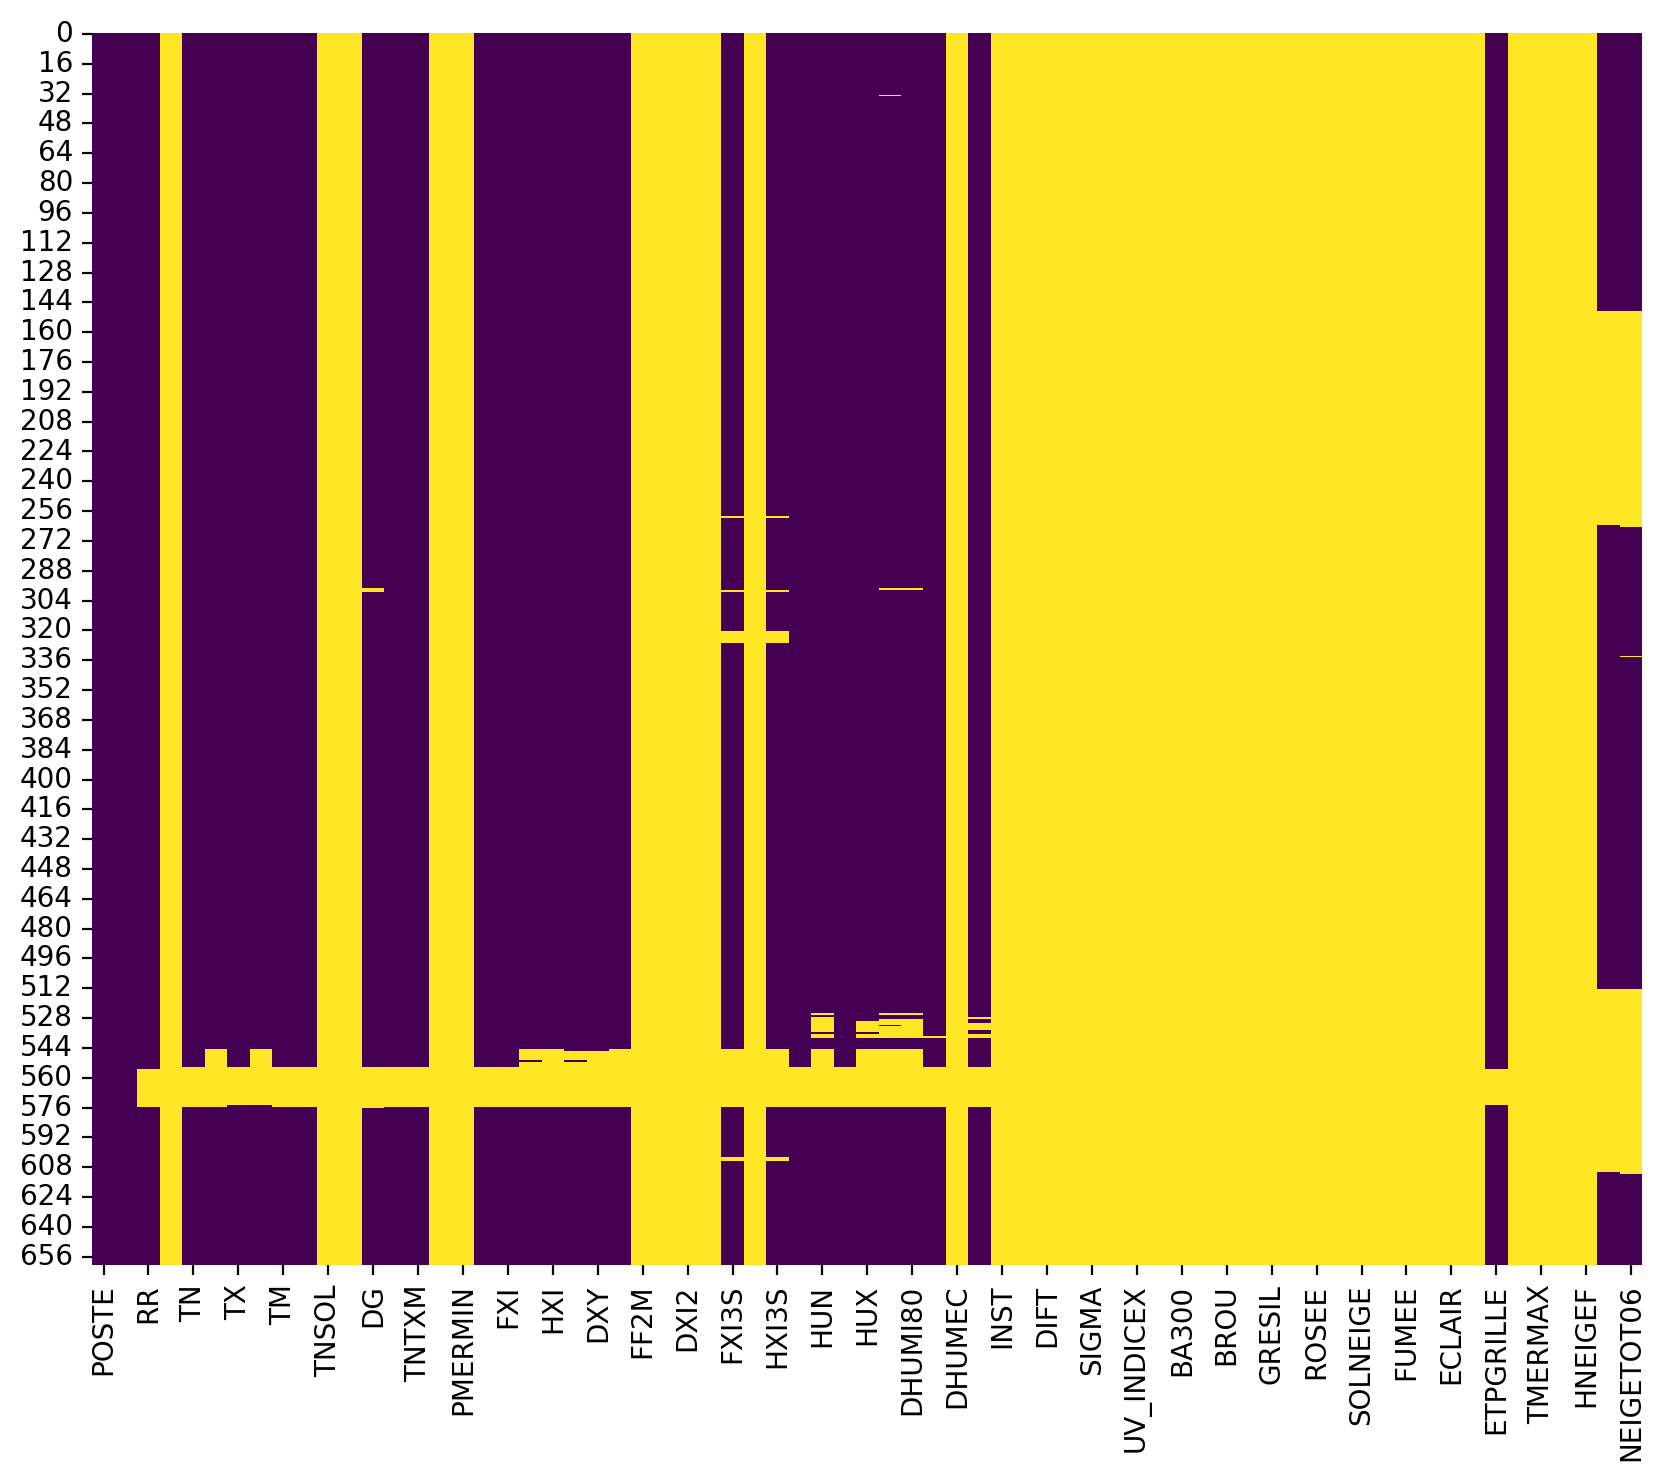

In [6]:
# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns

for col in df.select_dtypes(include="number"):
    print(f'{col:-<50} {df[col].isna().sum()/df.shape[0]}') 

# Création de la heatmap des valeurs manquantes
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [7]:
# Suppression des variables avec des valeurs manquantes : 
# Supprimer les colonnes où toutes les valeurs sont NaN
df_cleaned = df.dropna(axis=1, how='all')

print("\nDataFrame après suppression des colonnes vides :")
print(df_cleaned)


DataFrame après suppression des colonnes vides :
       POSTE      DATE    RR   TN     HTN    TX     HTX    TM   TMNX   DG  \
0    1014002  20230105   3,4  6,9  1816.0  10,8  1331.0   8,7   8,85  0.0   
1    1014002  20230106   0,0  5,6   814.0   8,6  1159.0   7,2   7,10  0.0   
2    1014002  20230107   8,0  6,7  2209.0  13,8  1241.0  10,1  10,25  0.0   
3    1014002  20230108  17,8  7,3   455.0  10,7  1300.0   9,1   9,00  0.0   
4    1014002  20230109   9,6  1,6  1302.0   5,0  1150.0   4,0   3,30  0.0   
..       ...       ...   ...  ...     ...   ...     ...   ...    ...  ...   
656  1014002  20241027   0,2  5,7   633.0  21,9  1354.0  13,3  13,80  0.0   
657  1014002  20241028   0,2  6,7   546.0  21,9  1236.0  12,6  14,30  0.0   
658  1014002  20241029   0,4  6,4  2251.0  21,7  1236.0  12,0  14,05  0.0   
659  1014002  20241030   0,2  4,9   632.0  21,8  1253.0  11,0  13,35  0.0   
660  1014002  20241031   0,0  2,9   657.0  20,2  1341.0   9,4  11,55  0.0   

     ...     HUN     UX  

<Axes: >

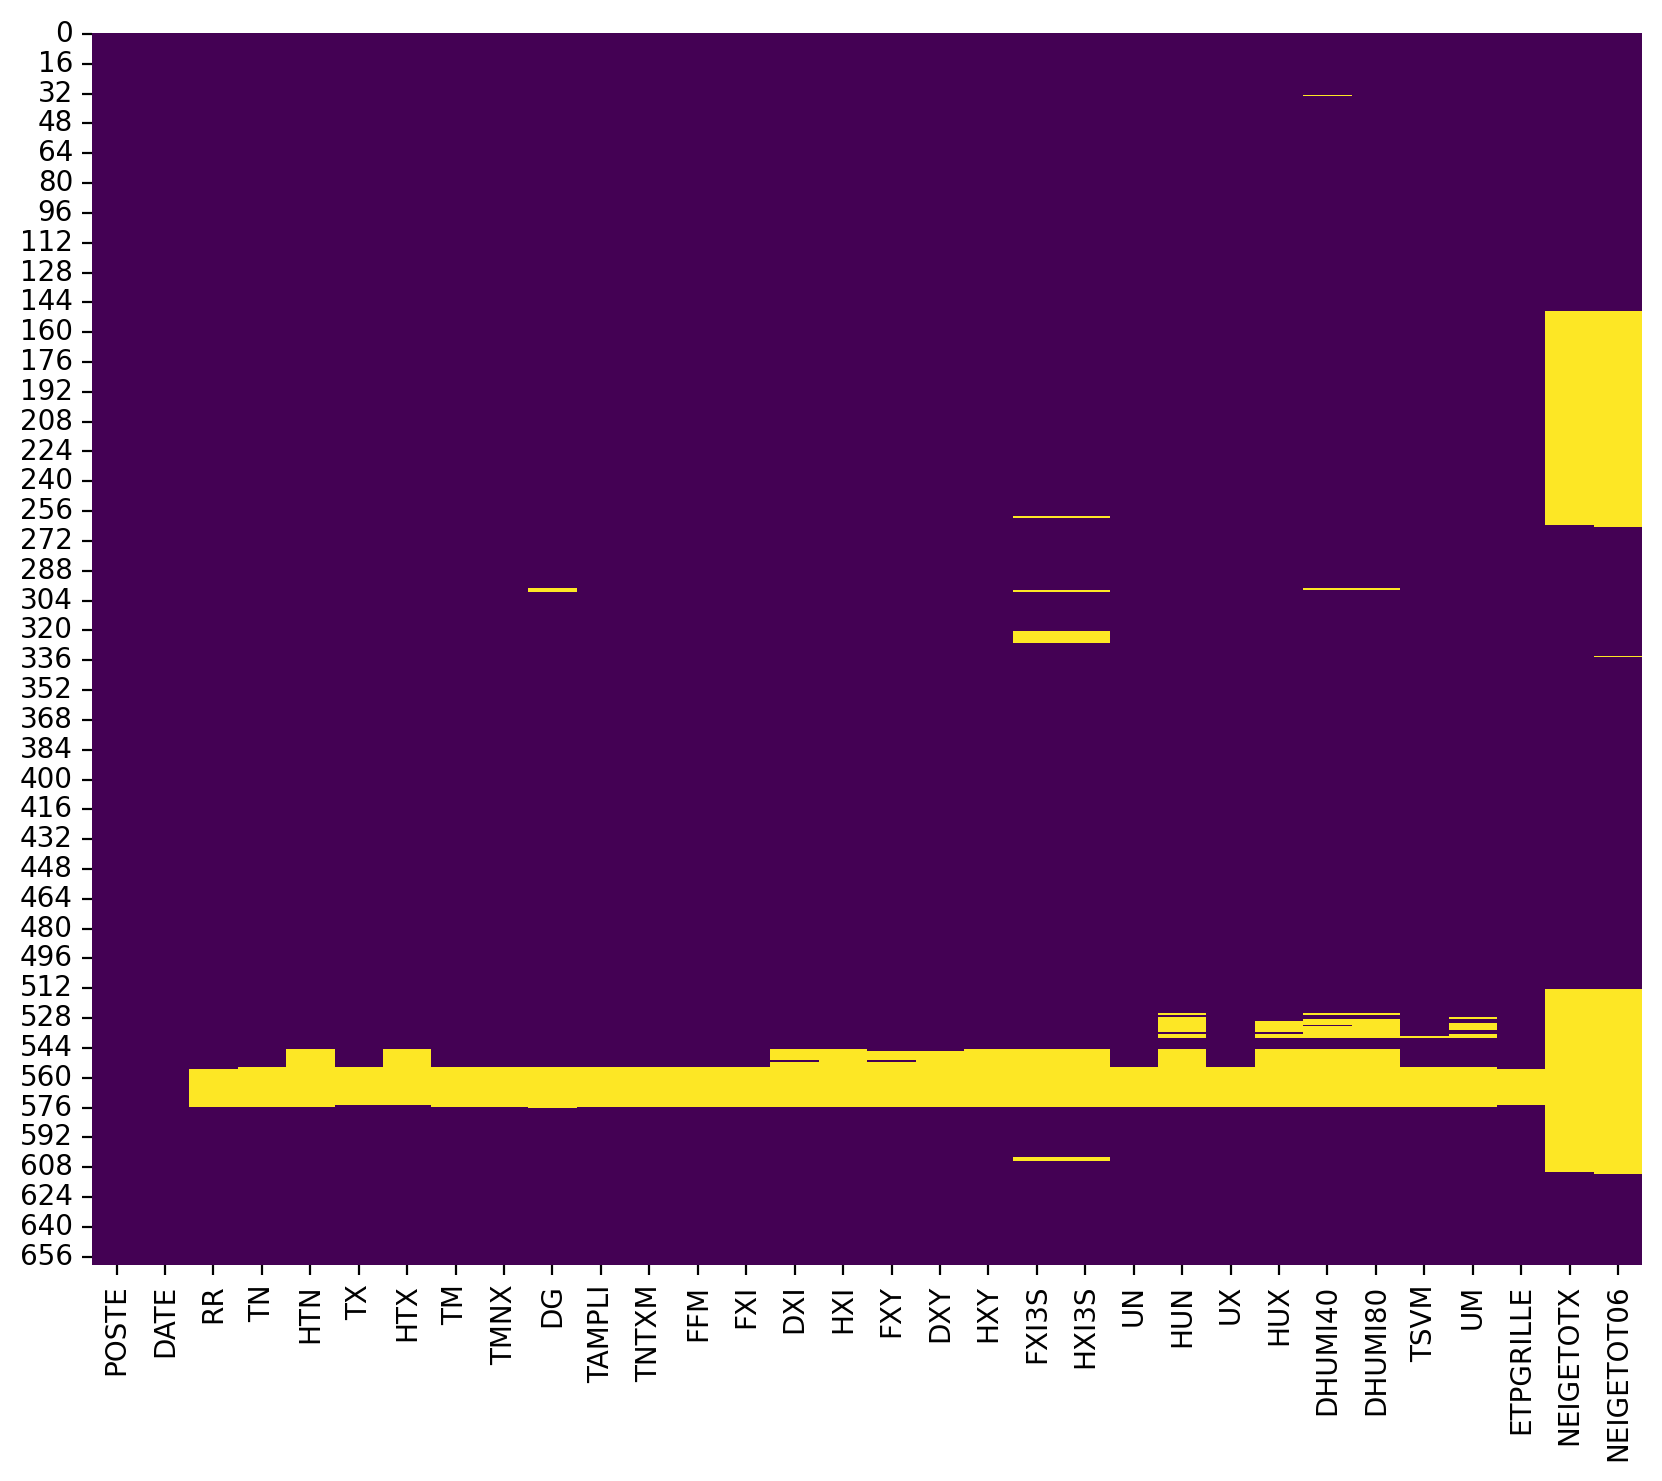

In [8]:
# Création de la heatmap des valeurs manquantes dans la base df_cleaned
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')

In [9]:
# Obtenir la liste des variables (colonnes)
variables = df_cleaned.columns.tolist()

# Afficher les variables
print("Liste des variables :")
print(variables)

Liste des variables :
['POSTE', 'DATE', 'RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE', 'NEIGETOTX', 'NEIGETOT06']


In [10]:
import pandas as pd

# Séparer les variables qualitatives (catégorielles) et quantitatives
variables_quantitatives = df_cleaned.select_dtypes(include=['number']).columns.tolist()  # Variables numériques
variables_qualitatives = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()  # Variables catégorielles

# Afficher les résultats
print("Variables quantitatives :")
print(variables_quantitatives)

print("\nVariables qualitatives (catégorielles) :")
print(variables_qualitatives)


Variables quantitatives :
['POSTE', 'DATE', 'HTN', 'HTX', 'DG', 'DXI', 'HXI', 'DXY', 'HXY', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'UM', 'NEIGETOTX', 'NEIGETOT06']

Variables qualitatives (catégorielles) :
['RR', 'TN', 'TX', 'TM', 'TMNX', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'FXY', 'FXI3S', 'TSVM', 'ETPGRILLE']


#### Traitement des variables quantitatives

In [48]:
corr_matrix = df_cleaned.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')


ValueError: could not convert string to float: '0,0'